In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy.random as npr

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

# let us check what has been loaded
print(dir(iris))
# a short description
print(iris.DESCR)
print(iris.target_names)

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.2

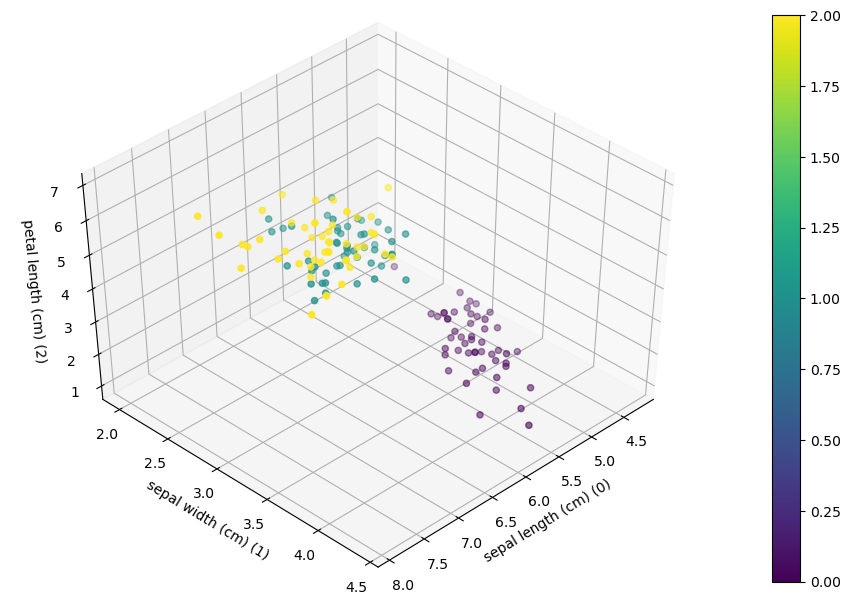

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
figiris = ax.scatter(iris.data[:,0],iris.data[:,1],iris.data[:,2],c=iris.target)
ax.set_xlabel(iris.feature_names[0]+' (0)')
ax.set_ylabel(iris.feature_names[1]+' (1)')
ax.set_zlabel(iris.feature_names[2]+' (2)')

# this adjusts the space around the plot so we can read the z label
plt.gcf().subplots_adjust(left=-0.5,bottom=-0.3)


plt.colorbar(figiris)
ax.view_init(45,45)
plt.show()

In [ ]:
from sklearn import svm

X = iris.data[:,[0,1,2]]
y = iris.target

rbf_svc = svm.SVC(kernel='poly', gamma=0.7, decision_function_shape='ovo').fit(X, y)
#rbf_svc = svm.SVC(kernel='poly', decision_function_shape='ovo').fit(X, y)


In [ ]:


x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
z = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)

xx,yy,zz = np.meshgrid(x,y,z, indexing = 'ij')

allpts = np.vstack((xx.ravel(),yy.ravel(),zz.ravel())).T

regions = rbf_svc.predict(allpts)
zeros = allpts[np.where(regions == 0),:][0]
ones = allpts[np.where(regions == 1),:][0]
twos = allpts[np.where(regions == 2),:][0]



In [ ]:
m = zeros.shape[0]
surfz = np.vstack([ zeros[i+1,:] for i in range(m-1) if np.any(zeros[i,[0,1]] != zeros[i+1,[0,1]]) ])
print(surfz.shape)


(9999, 3)


In [ ]:
m = ones.shape[0]
surfo = np.vstack([ ones[i+1,:] for i in range(m-1) if np.any(ones[i,[0,1]] != ones[i+1,[0,1]]) ])
print(surfo.shape)



(9999, 3)


In [ ]:
m = twos.shape[0]
surft = np.vstack([ twos[i+1,:] for i in range(m-1) if np.any(twos[i,[0,1]] != twos[i+1,[0,1]]) ])
print(surft.shape)


(9999, 3)


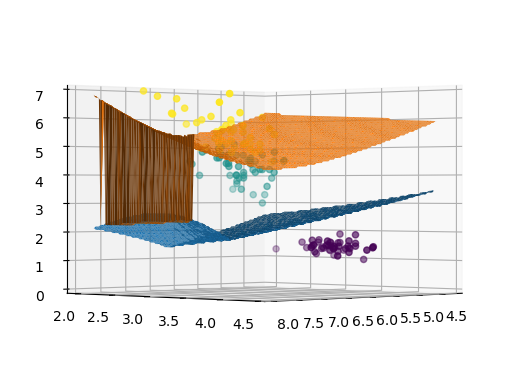

In [ ]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlim(0,7)
#ax.plot_trisurf(surfz[:,0],surfz[:,1],surfz[:,2])
ax.plot_trisurf(surfo[:,0],surfo[:,1],surfo[:,2])
ax.plot_trisurf(surft[:,0],surft[:,1],surft[:,2])
ax.scatter(iris.data[:,0],iris.data[:,1],iris.data[:,2],c=iris.target)

ax.view_init(0,45)
plt.show()

In [ ]:
dir(rbf_svc)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_pairwise',
 '_predict_log_proba',
 '_predict_proba',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predi

In [ ]:
sv=rbf_svc.support_vectors_


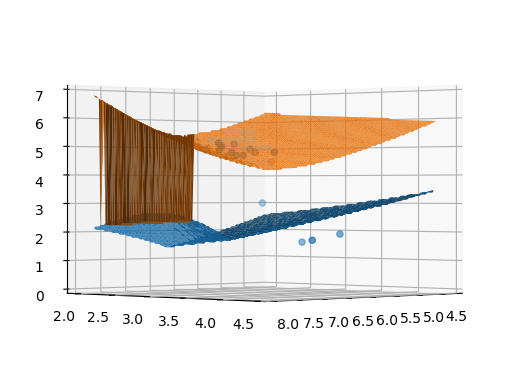

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlim(0,7)
#ax.plot_trisurf(surfz[:,0],surfz[:,1],surfz[:,2])
ax.plot_trisurf(surfo[:,0],surfo[:,1],surfo[:,2])
ax.plot_trisurf(surft[:,0],surft[:,1],surft[:,2])
ax.scatter(sv[:,0],sv[:,1],sv[:,2])

ax.view_init(0,45)
plt.show()

In [ ]:
X2 = iris.data[:,[1,2]]
target = np.where(iris.target == 1,1,-1)

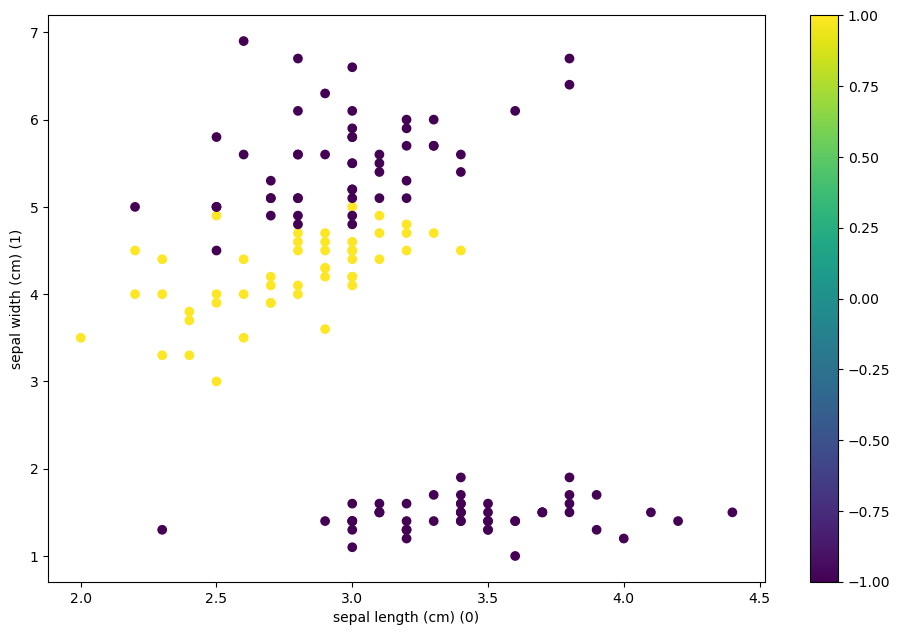

In [ ]:
fig = plt.figure()
ax = plt.axes()
figiris = ax.scatter(iris.data[:,1],iris.data[:,2],c=target)
ax.set_xlabel(iris.feature_names[0]+' (0)')
ax.set_ylabel(iris.feature_names[1]+' (1)')

# this adjusts the space around the plot so we can read the z label
plt.gcf().subplots_adjust(left=-0.5,bottom=-0.3)


plt.colorbar(figiris)
plt.show()

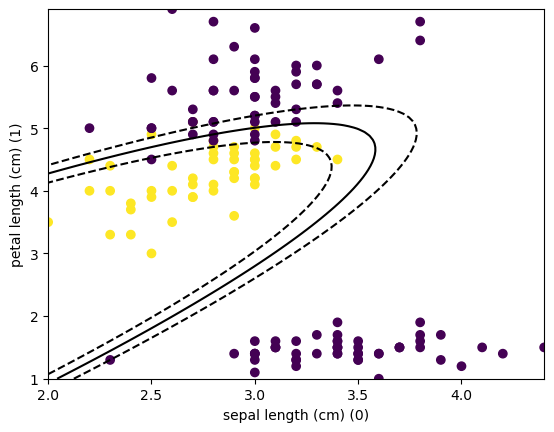

In [ ]:
polytwo = svm.SVC(kernel='poly', degree=2, gamma=0.7, decision_function_shape='ovo',C=100).fit(X2, target)

x = np.linspace(X2[:, 0].min(), X2[:, 0].max(), 100)
y = np.linspace(X2[:, 1].min(), X2[:, 1].max(), 100)

xx,yy = np.meshgrid(x,y)
allpts = np.vstack([xx.ravel(),yy.ravel()]).T

z = polytwo.decision_function(allpts)
ax = plt.axes()
figiris = ax.scatter(iris.data[:,1],iris.data[:,2],c=target)
ax.set_xlabel(iris.feature_names[0]+' (0)')
ax.set_ylabel(iris.feature_names[2]+' (1)')


ax.contour(xx,yy,z.reshape(xx.shape), levels =[-1,0,1], colors='k', linestyles=['--', '-', '--'])
plt.show()

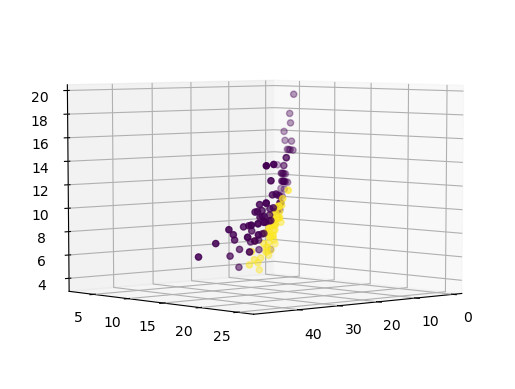

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
figiris = ax.scatter(iris.data[:,2]**2,iris.data[:,2]*iris.data[:,1],iris.data[:,1]**2,c=target)

ax.view_init(5,48)
plt.show()

(24, 2)


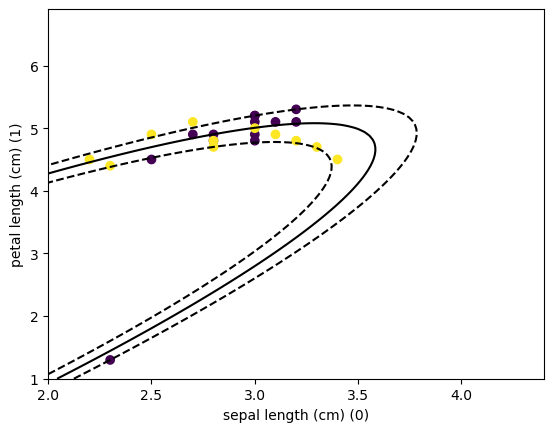

In [ ]:
ax = plt.axes()
sv = polytwo.support_vectors_
ind = polytwo.support_
figiris = ax.scatter(sv[:,0],sv[:,1],c=target[ind])
ax.set_xlabel(iris.feature_names[0]+' (0)')
ax.set_ylabel(iris.feature_names[2]+' (1)')

ax.contour(xx,yy,z.reshape(xx.shape), levels =[-1,0,1], colors='k', linestyles=['--', '-', '--'])
print(sv.shape)
plt.show()

In [ ]:
print(polytwo.dual_coef_)
print(polytwo.support_)

[[ -66.87812566 -100.         -100.          -16.29531567 -100.
  -100.         -100.         -100.         -100.         -100.
   -25.00588096   -1.03688663 -100.          100.          100.
   100.          100.          100.            9.21620891  100.
   100.          100.          100.          100.        ]]
[ 41 106 110 115 121 123 126 127 138 141 145 147 149  52  56  68  70  72
  73  76  77  83  85  87]


[ 0  3 10 11 18]


<ipython-input-20-252a760651c4>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


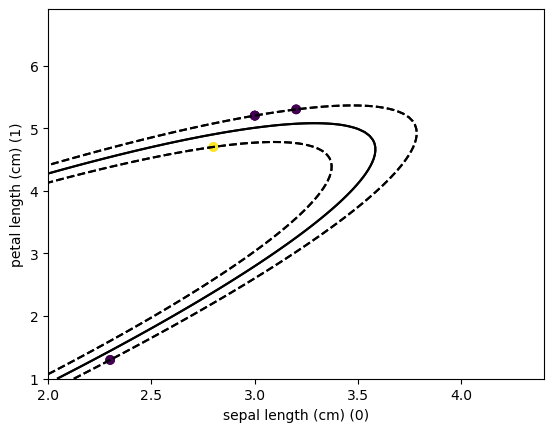

In [ ]:
indcorrect= np.where(polytwo.dual_coef_*target[ind]<100)[1]
# this is because lambda+nu = C, so wherever lambda < 100, we must have nu > 0, which implies xi=0
print(indcorrect)
ax = plt.axes()
svcorrect = sv[indcorrect,:]

figiris = ax.scatter(svcorrect[:,0],svcorrect[:,1],c=target[ind[indcorrect]])
ax.set_xlabel(iris.feature_names[0]+' (0)')
ax.set_ylabel(iris.feature_names[2]+' (1)')


ax.contour(xx,yy,z.reshape(xx.shape), levels =[-1,0,1], colors='k', linestyles=['--', '-', '--'])
plt.show()

[ 1  4  6  7  8 15 17 21]


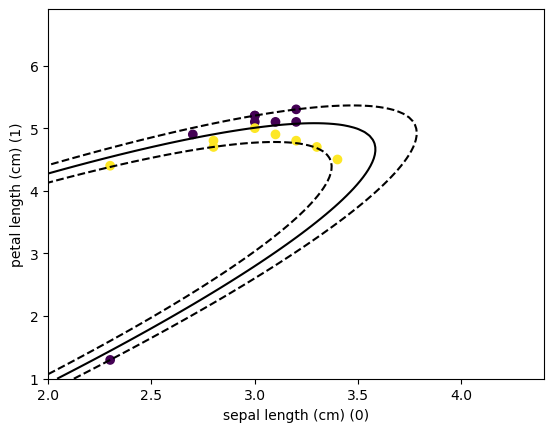

In [ ]:
indcloseincorrect= np.where(polytwo.dual_coef_*target[ind]==100)[1]
# this is because lambda+nu = C, so wherever lambda = 100, we must have nu = 0, which implies xi can be >0
predictions = polytwo.predict(polytwo.support_vectors_)
indclose = np.where(predictions == target[polytwo.support_])[0]
indincorrect = np.where(predictions != target[polytwo.support_])[0]
print(indincorrect)

ax = plt.axes()
svclose = sv[indclose,:]

figiris = ax.scatter(svclose[:,0],svclose[:,1],c=target[ind[indclose]])
ax.set_xlabel(iris.feature_names[0]+' (0)')
ax.set_ylabel(iris.feature_names[2]+' (1)')


ax.contour(xx,yy,z.reshape(xx.shape), levels =[-1,0,1], colors='k', linestyles=['--', '-', '--'])
plt.show()

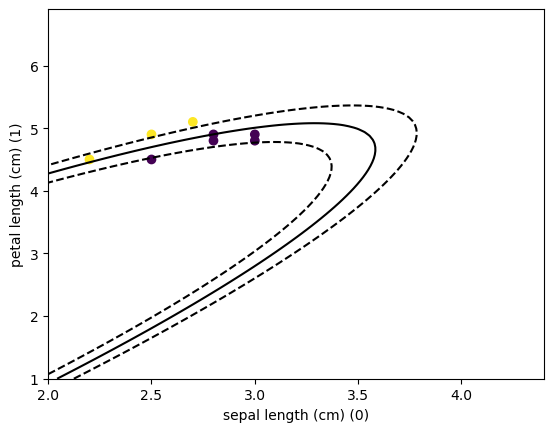

In [ ]:
ax = plt.axes()
svincorrect = sv[indincorrect,:]

figiris = ax.scatter(svincorrect[:,0],svincorrect[:,1],c=target[ind[indincorrect]])
ax.set_xlabel(iris.feature_names[0]+' (0)')
ax.set_ylabel(iris.feature_names[2]+' (1)')


ax.contour(xx,yy,z.reshape(xx.shape), levels =[-1,0,1], colors='k', linestyles=['--', '-', '--'])
plt.show()